## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
from plotly.offline import plot, iplot
import plotly.graph_objs as go
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

There is 1 csv file in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/incident_event_log.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# incident_event_log.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/drive/MyDrive/NIR_Gap/incident_event_log.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'incident_event_log.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 36 columns


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df1.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

In [9]:
df2 = pd.read_csv('/content/drive/MyDrive/NIR_Gap/incident_event_log.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'incident_event_log.csv'

In [10]:
df2.vendor.value_counts()

?    1000
Name: vendor, dtype: int64

In [11]:
df2.shape

(1000, 36)

In [12]:
df2.sys_created_by.value_counts()

?                 262
Created by 81     179
Created by 62     145
Created by 20      86
Created by 13      57
Created by 129     49
Created by 98      46
Created by 33      38
Created by 216     33
Created by 30      27
Created by 108     21
Created by 171      9
Created by 167      9
Created by 2        8
Created by 67       8
Created by 140      8
Created by 190      6
Created by 158      5
Created by 6        4
Name: sys_created_by, dtype: int64

In [13]:
df2.u_symptom.value_counts()

Symptom 470    237
?              199
Symptom 4      112
Symptom 580     63
Symptom 6       49
Symptom 471     46
Symptom 607     30
Symptom 609     29
Symptom 208     27
Symptom 87      25
Symptom 529     19
Symptom 592     17
Symptom 473     14
Symptom 273     14
Symptom 486     14
Symptom 232     13
Symptom 509     12
Symptom 116      8
Symptom 311      7
Symptom 118      6
Symptom 571      6
Symptom 253      6
Symptom 327      5
Symptom 2        5
Symptom 583      5
Symptom 117      4
Symptom 605      4
Symptom 450      4
Symptom 72       4
Symptom 226      3
Symptom 7        3
Symptom 159      2
Symptom 242      2
Symptom 568      2
Symptom 26       1
Symptom 17       1
Symptom 530      1
Symptom 560      1
Name: u_symptom, dtype: int64

In [14]:
df2['sys_created_by']= df2['sys_created_by'].replace("?",np.nan)
df2['u_symptom']= df2['u_symptom'].replace("?",np.nan)

In [15]:
df2= df2.dropna()

In [16]:
df2.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [17]:
df2['caller_id'] = df2['caller_id'].apply(lambda x: int(x.split()[-1]))
df2['opened_by'] = df2['opened_by'].apply(lambda x: int(x.split()[-1]))
df2['sys_created_by'] = df2['sys_created_by'].apply(lambda x: int(x.split()[-1]))
df2['sys_updated_by'] = df2['sys_updated_by'].apply(lambda x: int(x.split()[-1]))
df2['location'] = df2['location'].apply(lambda x: int(x.split()[-1]))
df2['category'] = df2['category'].apply(lambda x: int(x.split()[-1]))
df2['subcategory'] = df2['subcategory'].apply(lambda x: int(x.split()[-1]))
df2['u_symptom'] = df2['u_symptom'].apply(lambda x: int(x.split()[-1]))
df2['assignment_group'] = df2['assignment_group'].apply(lambda x: int(x.split()[-1]))
df2['closed_code'] = df2['closed_code'].apply(lambda x: int(x.split()[-1]))
df2['resolved_by'] = df2['resolved_by'].apply(lambda x: int(x.split()[-1]))

In [18]:
df2['impact'] = df2['impact'].apply(lambda x: int(x.split()[0]))
df2['urgency'] = df2['urgency'].apply(lambda x: int(x.split()[0]))
df2['priority'] = df2['priority'].apply(lambda x: int(x.split()[0]))

In [19]:
df2.drop(['number', 'contact_type', 'notify', 'cmdb_ci', 'vendor', 'caused_by'], axis='columns', inplace=True)

In [20]:
y = df2["incident_state"].value_counts()

data = [go.Bar(x=y.index, y=y.values)]
layout = go.Layout(
    title='incident_state',
    autosize=False,
    width=400,
    height=400,
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar15')


In [21]:
df2.problem_id.value_counts()

?                533
Problem ID  2    102
Problem ID  4      8
Name: problem_id, dtype: int64

In [22]:
df2.rfc.value_counts()

?             635
CHG0000127      8
Name: rfc, dtype: int64

In [23]:
df2.drop(['rfc'], axis='columns', inplace=True)

In [24]:
df2.assigned_to.value_counts()

?               216
Resolver 170     57
Resolver 78      42
Resolver 31      40
Resolver 216     28
Resolver 69      23
Resolver 159     22
Resolver 57      21
Resolver 89      17
Resolver 201     16
Resolver 236     15
Resolver 125     14
Resolver 253     13
Resolver 215     12
Resolver 176     10
Resolver 83       9
Resolver 249      8
Resolver 4        8
Resolver 71       8
Resolver 198      7
Resolver 180      7
Resolver 99       6
Resolver 135      6
Resolver 34       5
Resolver 17       5
Resolver 182      5
Resolver 84       4
Resolver 175      4
Resolver 186      4
Resolver 94       3
Resolver 127      3
Resolver 33       2
Resolver 97       2
Resolver 76       1
Name: assigned_to, dtype: int64

In [25]:
df2['problem_id']= df2['problem_id'].replace("?",np.nan)
df2['assigned_to']= df2['assigned_to'].replace("?",np.nan)

In [26]:
y = df2["problem_id"].value_counts()

data = [go.Bar(x=y.index, y=y.values)]
layout = go.Layout(
    title='problem_id',
    autosize=False,
    width=400,
    height=400,
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar15')


In [27]:
y = df2["assigned_to"].value_counts()

data = [go.Bar(x=y.index, y=y.values)]
layout = go.Layout(
    title='assigned_to',
    autosize=False,
    width=400,
    height=400,
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar15')


In [28]:
df2.drop(['problem_id', 'assigned_to'], axis='columns', inplace=True)

In [29]:
df2['incident_state'].unique()

array(['New', 'Resolved', 'Closed', 'Active', 'Awaiting User Info',
       'Awaiting Problem'], dtype=object)

In [30]:
df2 = pd.concat([df2,pd.get_dummies(df2['incident_state'], prefix='incident')],axis=1)
df2.drop(['incident_state'],axis=1, inplace=True) #удалить столбец incident_state

In [31]:
le1 = LabelEncoder()
cat_enc_le1 = le1.fit_transform(df2['active'])
df2['active'] = cat_enc_le1
le2 = LabelEncoder()
cat_enc_le2 = le2.fit_transform(df2['made_sla'])
df2['made_sla'] = cat_enc_le2
le3 = LabelEncoder()
cat_enc_le3 = le3.fit_transform(df2['knowledge'])
df2['knowledge'] = cat_enc_le3
le4 = LabelEncoder()
cat_enc_le4 = le4.fit_transform(df2['u_priority_confirmation'])
df2['u_priority_confirmation'] = cat_enc_le4

In [32]:
df2.columns = df2.columns.str.strip()   #удалить пробелы из названий столбцов

In [33]:
df2.head(5)

,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at,incident_Active,incident_Awaiting Problem,incident_Awaiting User Info,incident_Closed,incident_New,incident_Resolved
0,1,0,0,0,1,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,21,29/2/2016 01:23,143,55,170,72,2,2,3,56,1,0,5,149,29/2/2016 11:29,5/3/2016 12:00,0,0,0,0,1,0
1,1,0,0,2,1,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,642,29/2/2016 08:53,143,55,170,72,2,2,3,56,1,0,5,149,29/2/2016 11:29,5/3/2016 12:00,0,0,0,0,0,1
2,1,0,0,3,1,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,804,29/2/2016 11:29,143,55,170,72,2,2,3,56,1,0,5,149,29/2/2016 11:29,5/3/2016 12:00,0,0,0,0,0,1
3,0,0,0,4,1,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,908,5/3/2016 12:00,143,55,170,72,2,2,3,56,1,0,5,149,29/2/2016 11:29,5/3/2016 12:00,0,0,0,1,0,0
4,1,0,0,0,1,2403,397,29/2/2016 04:40,171,29/2/2016 04:57,746,29/2/2016 04:57,165,40,215,471,2,2,3,70,1,0,5,81,1/3/2016 09:52,6/3/2016 10:00,0,0,0,0,1,0


In [34]:
df2.caller_id.value_counts()

203     26
378     24
2403    22
781     21
307     19
        ..
2949     3
229      3
786      3
1805     3
4598     1
Name: caller_id, Length: 84, dtype: int64

In [35]:
df2.dtypes

active                          int64
reassignment_count              int64
reopen_count                    int64
sys_mod_count                   int64
made_sla                        int64
caller_id                       int64
opened_by                       int64
opened_at                      object
sys_created_by                  int64
sys_created_at                 object
sys_updated_by                  int64
sys_updated_at                 object
location                        int64
category                        int64
subcategory                     int64
u_symptom                       int64
impact                          int64
urgency                         int64
priority                        int64
assignment_group                int64
knowledge                       int64
u_priority_confirmation         int64
closed_code                     int64
resolved_by                     int64
resolved_at                    object
closed_at                      object
incident_Act

In [36]:
df2.head(5)

,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at,incident_Active,incident_Awaiting Problem,incident_Awaiting User Info,incident_Closed,incident_New,incident_Resolved
0,1,0,0,0,1,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,21,29/2/2016 01:23,143,55,170,72,2,2,3,56,1,0,5,149,29/2/2016 11:29,5/3/2016 12:00,0,0,0,0,1,0
1,1,0,0,2,1,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,642,29/2/2016 08:53,143,55,170,72,2,2,3,56,1,0,5,149,29/2/2016 11:29,5/3/2016 12:00,0,0,0,0,0,1
2,1,0,0,3,1,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,804,29/2/2016 11:29,143,55,170,72,2,2,3,56,1,0,5,149,29/2/2016 11:29,5/3/2016 12:00,0,0,0,0,0,1
3,0,0,0,4,1,2403,8,29/2/2016 01:16,6,29/2/2016 01:23,908,5/3/2016 12:00,143,55,170,72,2,2,3,56,1,0,5,149,29/2/2016 11:29,5/3/2016 12:00,0,0,0,1,0,0
4,1,0,0,0,1,2403,397,29/2/2016 04:40,171,29/2/2016 04:57,746,29/2/2016 04:57,165,40,215,471,2,2,3,70,1,0,5,81,1/3/2016 09:52,6/3/2016 10:00,0,0,0,0,1,0


In [37]:
df3=df2

In [38]:
df3.columns.to_series().groupby(df2.dtypes).groups

{uint8: ['incident_Active', 'incident_Awaiting Problem', 'incident_Awaiting User Info', 'incident_Closed', 'incident_New', 'incident_Resolved'], int64: ['active', 'reassignment_count', 'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'sys_created_by', 'sys_updated_by', 'location', 'category', 'subcategory', 'u_symptom', 'impact', 'urgency', 'priority', 'assignment_group', 'knowledge', 'u_priority_confirmation', 'closed_code', 'resolved_by'], object: ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']}

In [39]:
df3.drop(['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at'], axis = 1, inplace = True)


In [40]:
df3.head(5)

,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,sys_updated_by,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,knowledge,u_priority_confirmation,closed_code,resolved_by,incident_Active,incident_Awaiting Problem,incident_Awaiting User Info,incident_Closed,incident_New,incident_Resolved
0,1,0,0,0,1,2403,8,6,21,143,55,170,72,2,2,3,56,1,0,5,149,0,0,0,0,1,0
1,1,0,0,2,1,2403,8,6,642,143,55,170,72,2,2,3,56,1,0,5,149,0,0,0,0,0,1
2,1,0,0,3,1,2403,8,6,804,143,55,170,72,2,2,3,56,1,0,5,149,0,0,0,0,0,1
3,0,0,0,4,1,2403,8,6,908,143,55,170,72,2,2,3,56,1,0,5,149,0,0,0,1,0,0
4,1,0,0,0,1,2403,397,171,746,165,40,215,471,2,2,3,70,1,0,5,81,0,0,0,0,1,0


In [41]:
df2.dtypes

active                         int64
reassignment_count             int64
reopen_count                   int64
sys_mod_count                  int64
made_sla                       int64
caller_id                      int64
opened_by                      int64
sys_created_by                 int64
sys_updated_by                 int64
location                       int64
category                       int64
subcategory                    int64
u_symptom                      int64
impact                         int64
urgency                        int64
priority                       int64
assignment_group               int64
knowledge                      int64
u_priority_confirmation        int64
closed_code                    int64
resolved_by                    int64
incident_Active                uint8
incident_Awaiting Problem      uint8
incident_Awaiting User Info    uint8
incident_Closed                uint8
incident_New                   uint8
incident_Resolved              uint8
d

Let's take a quick look at what the data looks like:

In [43]:
df2.columns[df2.isna().any()].tolist()

[]

In [44]:
df3.shape

(643, 27)

Distribution graphs (histogram/bar graph) of sampled columns:

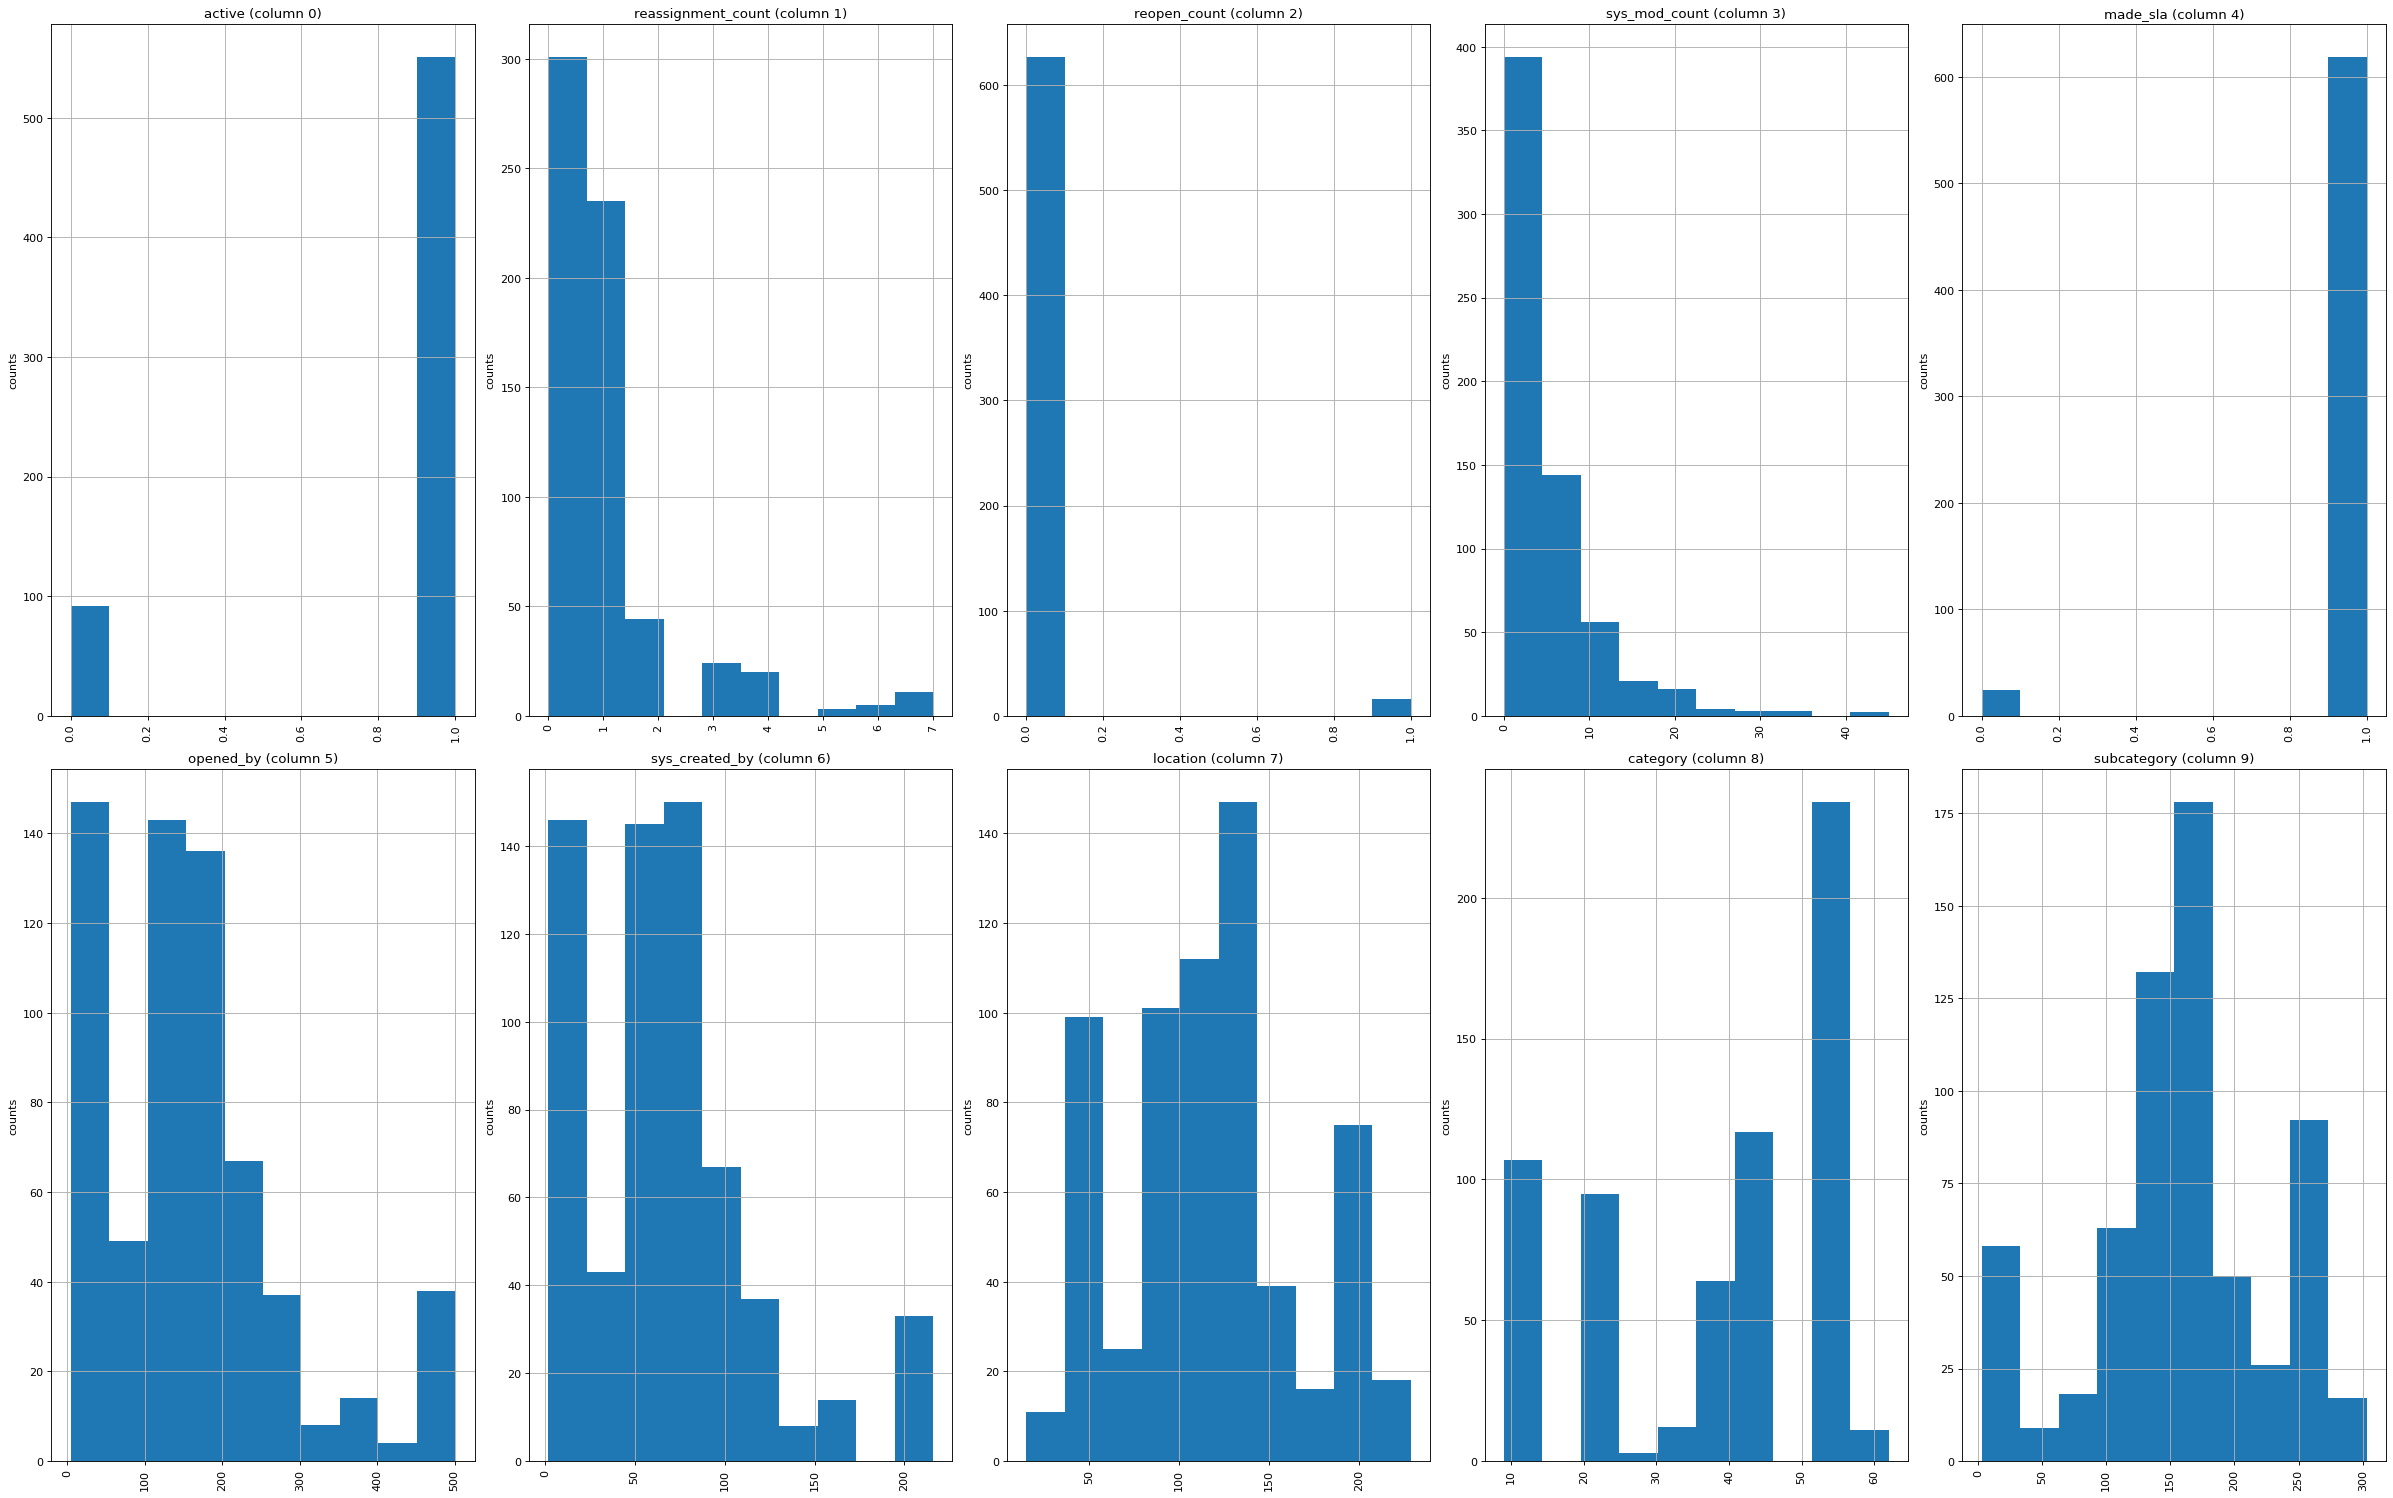

In [45]:
plotPerColumnDistribution(df2, 10, 5)

Correlation matrix:

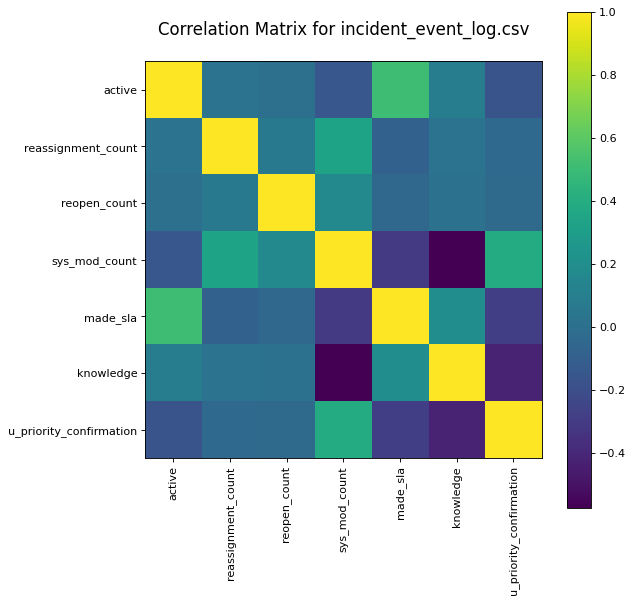

In [46]:
plotCorrelationMatrix(df1, 8)

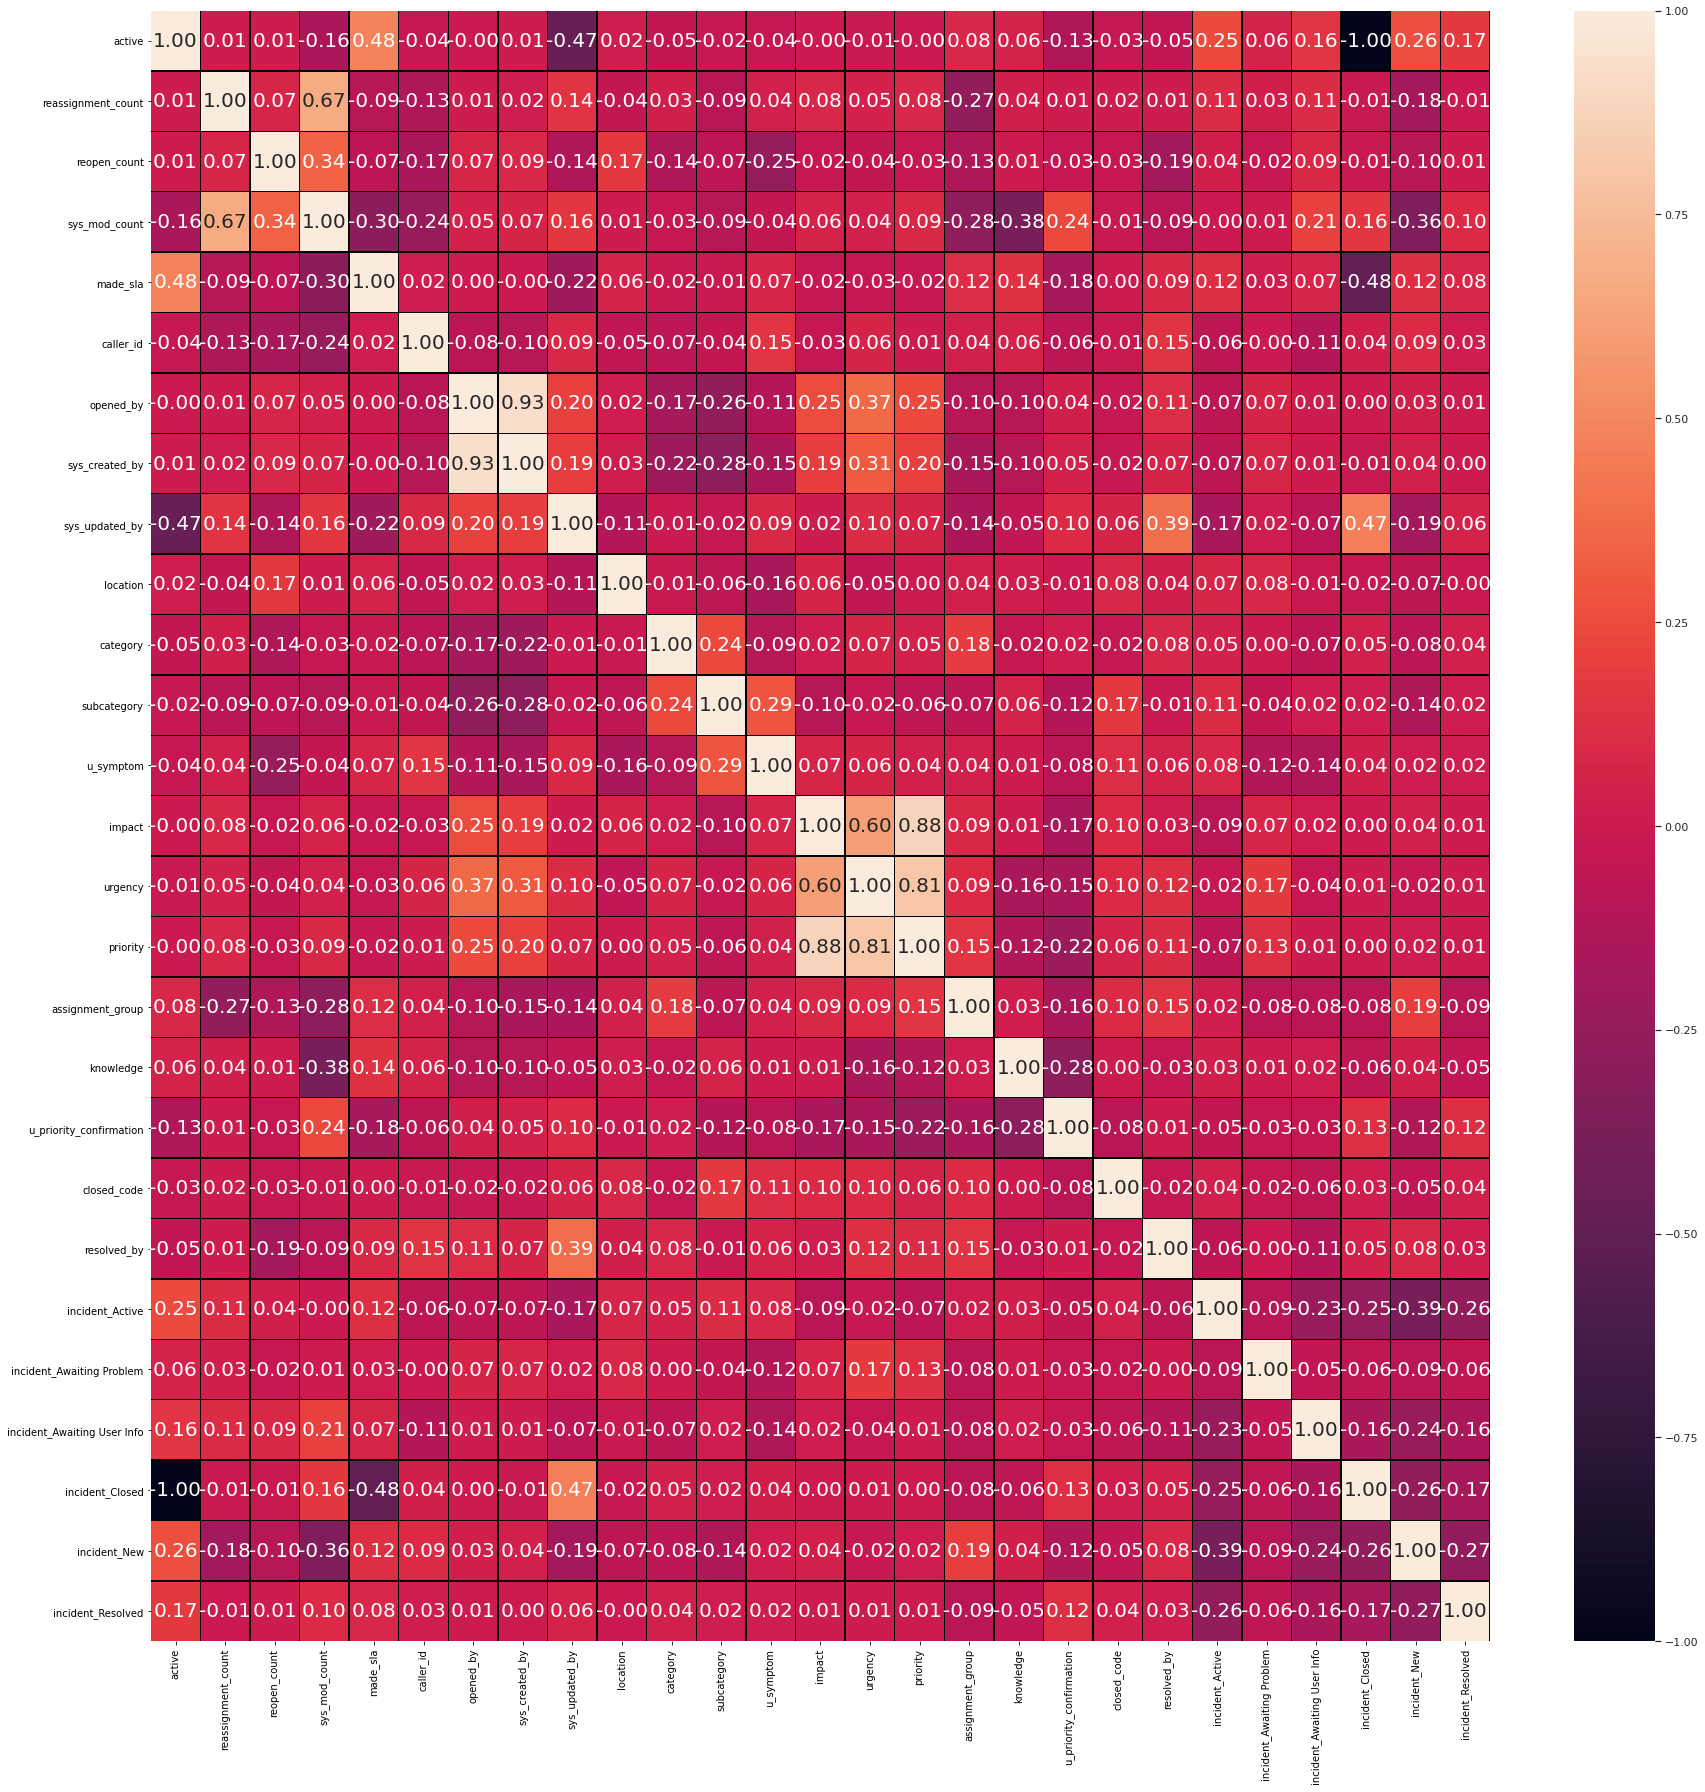

In [47]:
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.set(font_scale=1)
sns.heatmap(df3.corr(), annot=True, annot_kws={"size": 20}, linecolor='black', linewidths=.5, ax=ax, fmt='.2f')